In [29]:
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt

In [30]:
y, sr = librosa.load(".\\babble_16k.wav")

In [31]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

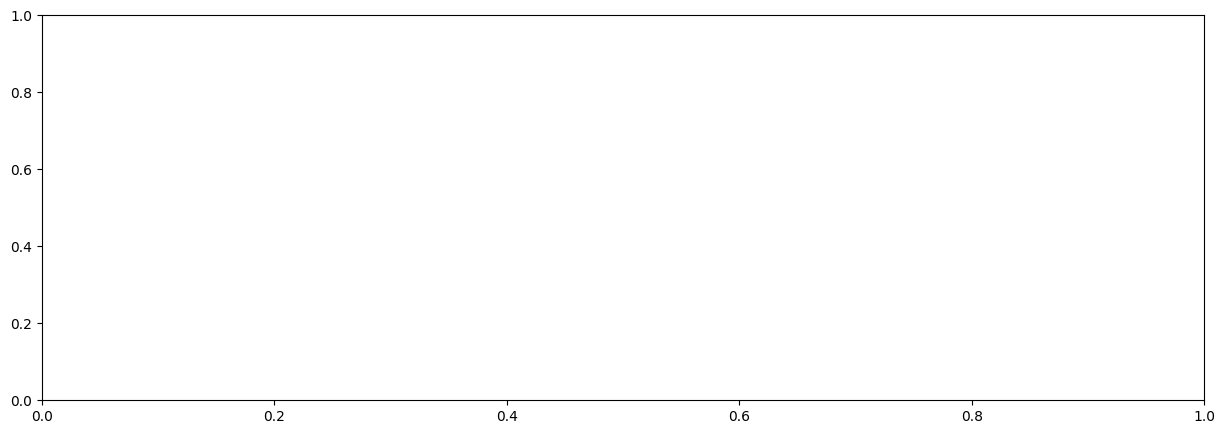

In [32]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(y, sr=sr) 
plt.xlabel('time (s)') 
plt.ylabel('amplitude')
plt.title('noise signal')
plt.show()

In [56]:
import os
data_directory = ".\\intro-disclaimers"
durations = []

def process_directory(directory):
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):
            process_directory(item_path)
        
        elif item.endswith('.flac'):
            cl, sr_cl = librosa.load(item_path, sr=None)
            duration = librosa.get_duration(y=cl, sr=sr_cl)
            durations.append(duration)


process_directory(data_directory)
average_duration = sum(durations) / len(durations)
print(f"Durée moyenne des audios: {average_duration:.2f} secondes")


Durée moyenne des audios: 11.28 secondes


In [58]:

import soundfile as sf
noise_directory =".\\noise"
segment_length = int(sr * 11.28)  

for start in range(0, len(y), segment_length):
    end = start + segment_length
    segment = y[start:end]
    output_path = os.path.join(noise_directory, f'segment_{start//segment_length}.wav')

    sf.write(output_path, segment, sr)


In [77]:
from random import choice as rand_choice
import soundfile as sf
import os

noisy_audio_directory = ".\\noisy_audio"

def process_directory(directory):
    audio_data = []

    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        if os.path.isdir(item_path):
            audio_data.extend(process_directory(item_path))
        elif item.endswith('.flac'):
            voice, sr_voice = librosa.load(item_path, sr=None)
            audio_data.append((voice, sr_voice))

    return audio_data

audio_data = process_directory(data_directory)

for voice, sr_voice in audio_data:
    if len(voice) <= segment_length:
        noise_files = [f for f in os.listdir(noise_directory) if f.endswith('.wav')]
        random_noise_file = rand_choice(noise_files)
        noise_segment_path = os.path.join(noise_directory, random_noise_file)
        noise, sr_noise = librosa.load(noise_segment_path, sr=None)

        if sr_noise != sr_voice:
            
            noise = librosa.resample(noise, orig_sr=sr_noise, target_sr=sr_voice)
            sr_noise = sr_voice

        if len(voice) > len(noise):
            voice = voice[:len(noise)]
        else:
            noise = noise[:len(voice)]

        noisy_voice = voice + noise
        print(noisy_voice)
        if not os.path.exists(noisy_audio_directory ):
         os.makedirs(noisy_audio_directory )

        output_path = os.path.join(noisy_audio_directory , f'noisy_voice.flac')
        sf.write(output_path, noisy_voice, sr_voice)


[-0.02910502 -0.04753743 -0.05265822 ...  0.11166371  0.06944777
  0.00962187]
[-0.05125096 -0.07534181 -0.07700677 ... -0.06011176 -0.08022934
 -0.09632536]
[-0.02757914 -0.04723225 -0.05110182 ... -0.05108653 -0.04551194
 -0.05690645]
[-0.0326626  -0.03891359 -0.0261499  ...  0.10564786  0.09710206
  0.10162598]
[-0.05244115 -0.07631838 -0.07783075 ... -0.07122623 -0.07094848
 -0.07227907]
[-0.08023042 -0.09871492 -0.06547217 ...  0.05320896  0.05950645
  0.06342025]
[0.02914409 0.04195444 0.0452799  ... 0.03203056 0.06061868 0.03537195]
[ 0.05989767  0.04473677 -0.00678336 ...  0.0129659   0.00644123
  0.01360388]
[0.10564353 0.08883467 0.03752816 ... 0.01894691 0.05792404 0.0881799 ]
[-0.05170872 -0.07567751 -0.0772204  ... -0.0299604   0.00088638
 -0.06406828]
[0.04281596 0.05596201 0.05895178 ... 0.21806458 0.17980655 0.0943907 ]
[ 0.03109566  0.0204128  -0.00562784 ...  0.05022628  0.07208185
  0.08947015]
[ 0.0323163   0.02349184 -0.00173933 ...  0.03741107  0.05043236
  0.0627

LibsndfileError: Error opening '.\\noisy_audio\\noisy_voice.flac': System error.